 # DL for NLP

* EDA helps to get meanigful insigts from data.

# Pre processing 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

c:\users\me\appdata\local\programs\python\python37\lib\site-packages\matplotlib\__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [4]:
import nltk

In [5]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.CSV")

In [4]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [65]:
df.describe().T
#df.info()

,count,mean,std,min,25%,50%,75%,max
Age,22634.0,43.280772,12.326740,18.0,34.0,41.0,52.0,99.0
Rating,22634.0,4.183441,1.115761,1.0,4.0,5.0,5.0,5.0
Recommended IND,22634.0,0.818857,0.385145,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,22634.0,2.630953,5.786929,0.0,0.0,1.0,3.0,122.0
length,22634.0,249.129142,115.469654,8.0,151.0,243.0,370.0,426.0


In [7]:
df['Review Text'].nunique()

22634

In [6]:
df.drop(labels=['Unnamed: 0', 'Clothing ID','Division Name','Department Name','Class Name'],axis=1,inplace=True)
#sns.heatmap(df.corr())

In [6]:
df.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6


In [7]:
df["Rating"].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

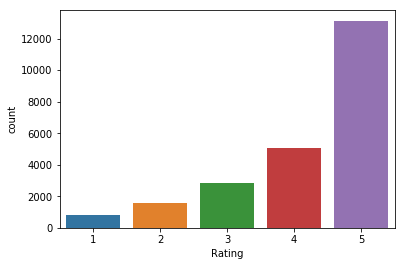

In [8]:
sns.countplot(df["Rating"])

'\ndef text_len(txt):\n    #txt = "".join(txt.split())\n    return len(txt)\n\ndf["length"] = df["Review Text"].apply(lambda x : text_len(x))  \n'

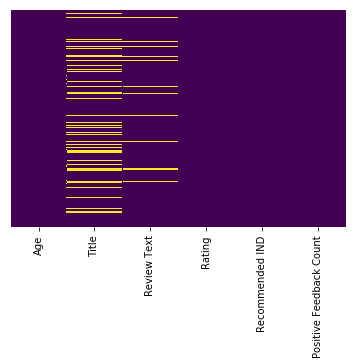

In [28]:
# yellow lines is showing missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [29]:
df.count()

Age                        23486
Title                      19676
Review Text                22641
Rating                     23486
Recommended IND            23486
Positive Feedback Count    23486
dtype: int64

In [20]:
#Dropping of rows that had missing value in review text
df["Rating"].isnull().value_counts()

False    23486
Name: Rating, dtype: int64

In [7]:
df.dropna(subset=['Review Text'],inplace=True)

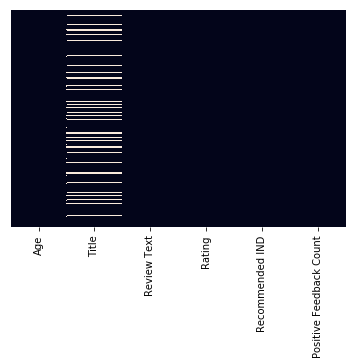

In [31]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

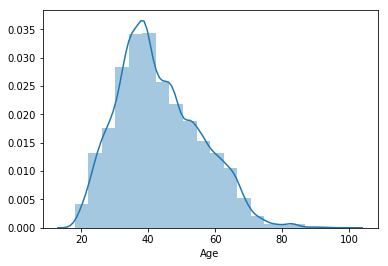

In [49]:
#Checking districution of age 
sns.distplot(df["Age"], bins=20, kde=True);

In [32]:
df.count()

Age                        22641
Title                      19675
Review Text                22641
Rating                     22641
Recommended IND            22641
Positive Feedback Count    22641
dtype: int64

In [8]:
def text_len(txt):
    txt = "".join(txt.split())
    return len(txt)

df["length"] = df["Review Text"].apply(lambda x : text_len(x))  


In [35]:
df.tail()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,length
23481,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,131
23482,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,223
23483,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,208
23484,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,427
23485,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,110


In [38]:
df[["Age","Rating","Recommended IND","Positive Feedback Count"]].corr()

,Age,Rating,Recommended IND,Positive Feedback Count
Age,1.000000,0.029962,0.034208,0.040850
Rating,0.029962,1.000000,0.792568,-0.060984
Recommended IND,0.034208,0.792568,1.000000,-0.065923
Positive Feedback Count,0.040850,-0.060984,-0.065923,1.000000


# Rating ~~ Recommended ind

In [1]:
#sns.scatterplot(x="Rating",y="Recommended IND",data=df)
#sns.countplot(x="Rating",y="Recommended IND",data=df)
2+2

4

In [42]:
df['Review Text'].iloc[305]

'I just purchased this beautiful printed blouse in the pink color and love it! i almost always wear a size small at retailer (34d-27-35) and the fit and length are both perfect on me. if you are smaller chested you can easily go down a size. i absolutely had to have this whe i first saw it at the store and noticed how popular it was as i had to order it due to it selling out like hot cakes there. what i like about it is the texture and the ruffles at the front plus the length of the sleeves stop ri'

In [43]:
df['Review Text'].iloc[3205]

"I could seriously sleep in this--it's that soft! i dressed this with a white tee and holey jeans then i wore it to work today over a blue midi dress. love this jacket!!!"

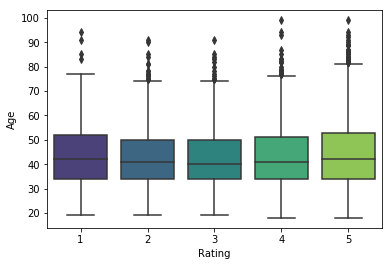

In [45]:
sns.boxplot(x = "Rating", y = "Age", data= df,palette="viridis")

# Compares common review and its ratings, keeps unique review

In [9]:
df_dublicates = pd.DataFrame()

In [10]:
type(df_dublicates)

pandas.core.frame.DataFrame

In [11]:
df_dublicates = df[df.duplicated(subset=["Review Text"])] #df[df["Review Text"].isin()
del df_dublicates["Positive Feedback Count"]

In [12]:
df_dublicates.head(7)

,Age,Title,Review Text,Rating,Recommended IND,length
10067,26,Love retailer bathing suits!,Perfect fit and i've gotten so many compliment...,5,1,67
11074,60,Cute cover-up or summer top & shorts!,"Lightweight, soft cotton top and shorts. i thi...",5,1,403
12526,42,"Beautiful dress, fits horribly",I purchased this and another eva franco dress ...,2,0,407
13354,26,Love retailer bathing suits!,Perfect fit and i've gotten so many compliment...,5,1,67
14275,43,Love this shirt,I bought this shirt at the store and after goi...,5,1,274
21470,60,Soft & beautiful!,The sweater and skirt are so pretty! they're r...,5,1,180
21888,37,NaN,"Love, love these jeans. being short they come ...",5,1,173


In [13]:
df_dublicates['Review Text'].iloc[6]

'Love, love these jeans. being short they come right to my ankle. super soft and don?t require any hemming. i ordered my typical jean size of 26 and they fit like a glove. would love to have these in black and grey.'

In [19]:
df[df["Review Text"]=="The sweater and skirt are so pretty! they're really soft and have such an easy, comfortable look together. really love this gorgeous outfit.\n\ni am borderline small/medium and kept the size small after trying both on."]

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,length
16988,60,Soft & beautiful!,The sweater and skirt are so pretty! they're r...,5,1,1,180
21470,60,Soft & beautiful!,The sweater and skirt are so pretty! they're r...,5,1,5,180


In [16]:
df_dublicates.count()pos

Age                7
Title              6
Review Text        7
Rating             7
Recommended IND    7
length             7
dtype: int64

In [20]:
df[df["Review Text"]=="Love, love these jeans. being short they come right to my ankle. super soft and don?t require any hemming. i ordered my typical jean size of 26 and they fit like a glove. would love to have these in black and grey."]

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,length
9447,37,NaN,"Love, love these jeans. being short they come ...",5,1,0,173
21888,37,NaN,"Love, love these jeans. being short they come ...",5,1,0,173


In [21]:
df.count()

Age                        22641
Title                      19675
Review Text                22641
Rating                     22641
Recommended IND            22641
Positive Feedback Count    22641
length                     22641
dtype: int64

In [22]:
df.drop_duplicates(subset=["Review Text"],keep='first',inplace=True)

In [26]:
df["Review Text"].count()

22634

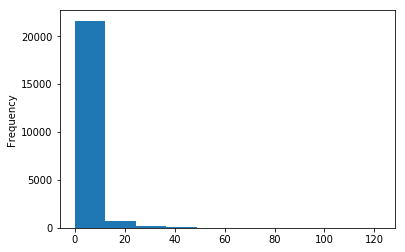

In [28]:
df["Positive Feedback Count"].plot.hist()

In [29]:
sns.scatterplot()

18

In [36]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

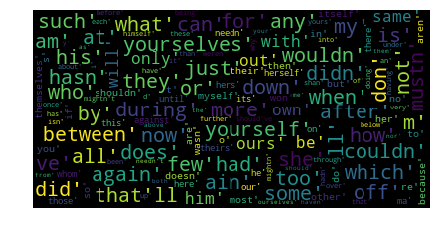

In [58]:
from wordcloud import WordCloud
    
wordcloud  = WordCloud(
    background_color='black',
   # stopwords=stopWords,
    max_words=150,
    max_font_size=20, 
    random_state=42
    ).generate(str(stopWords))#(str(df_dublicates["Review Text"]))
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show() 

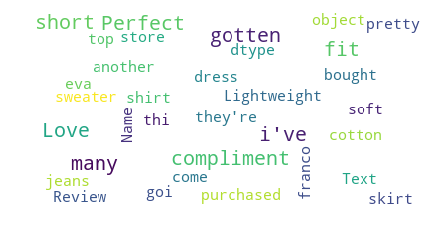

In [61]:
wordcloud  = WordCloud(
    background_color='white',
    stopwords=stopWords,
    max_words=150,
    max_font_size=20, 
    random_state=42
    ).generate(str(df_dublicates["Review Text"]))
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)   
plt.show() 
fig.savefig("word1.png", dpi=900)

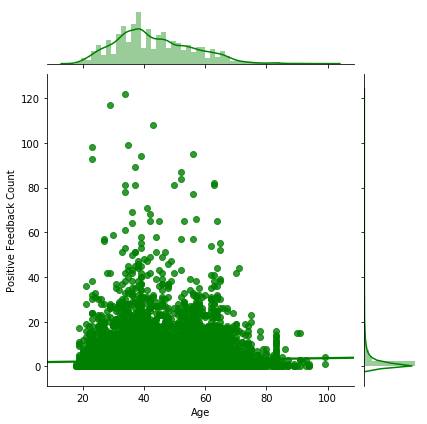

In [71]:
sns.jointplot(x=df["Age"],y=df["Positive Feedback Count"],kind='reg',color='g')

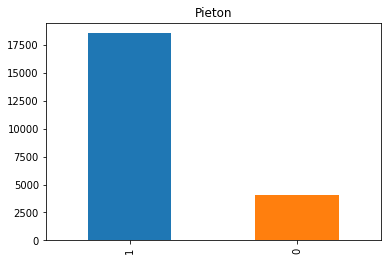

In [75]:
#sns.distplot(df['Recommended IND'])
df['Recommended IND'].value_counts().plot(kind='bar', 
                                     title='Pieton')

In [76]:
df['Recommended IND'].value_counts()

1    18534
0     4100
Name: Recommended IND, dtype: int64